In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv(r"E:\titanic_train.csv")


In [6]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

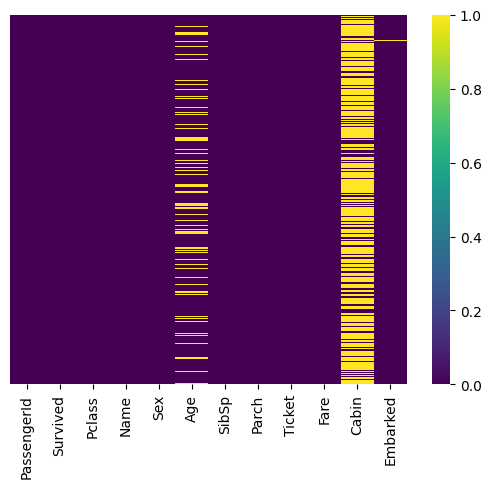

In [12]:
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False)

#The ages and the cabin class has some missing values, we can ignore Embarked as it only has one missing values

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass  = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 224
    else:
        return Age

In [26]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

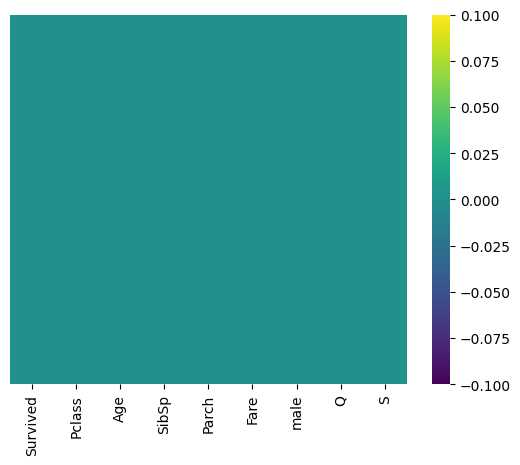

In [104]:
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False)


In [28]:
#for the cabin cilumn, there is so much missing information to do anything with the cabin
#its best to drop it

In [38]:
train['Cabin'].drop(inplace= True)
train.dropna(inplace=True)

<Axes: >

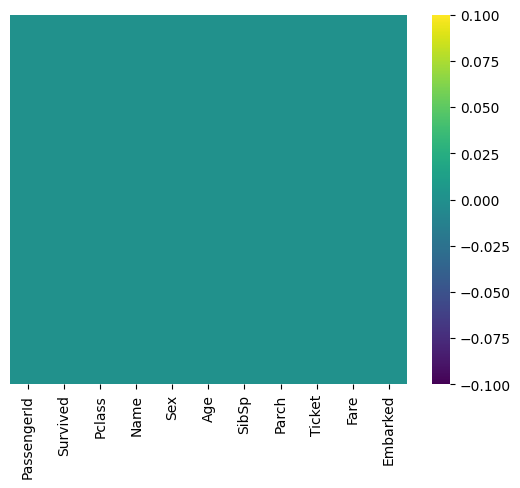

In [40]:
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False)

In [71]:
#Dealing with categorial columns

sex = pd.get_dummies(train['Sex'], drop_first=True)
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [72]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [76]:
train= pd.concat([train, sex, embark], axis=1)

In [77]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,True,False,True,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,False,False,True,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,224.0,1,2,W./C. 6607,23.4500,S,False,False,True,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,True,False,False,True,False,False


In [85]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S', 'male', 'Q', 'S'],
      dtype='object')

In [87]:
#train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [97]:
#deleting duplicate columns
train = train.transpose().drop_duplicates().transpose()
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.25,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.925,False,False,True
3,4,1,1,35.0,1,0,53.1,False,False,True
4,5,0,3,35.0,0,0,8.05,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0,True,False,True
887,888,1,1,19.0,0,0,30.0,False,False,True
888,889,0,3,224.0,1,2,23.45,False,False,True
889,890,1,1,26.0,0,0,30.0,True,False,False


In [102]:
#We can also delete the PassengerId as it is just an index incrementing with 1

train.drop('PassengerId', inplace= True, axis=1)

In [103]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.25,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.925,False,False,True
3,1,1,35.0,1,0,53.1,False,False,True
4,0,3,35.0,0,0,8.05,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0,True,False,True
887,1,1,19.0,0,0,30.0,False,False,True
888,0,3,224.0,1,2,23.45,False,False,True
889,1,1,26.0,0,0,30.0,True,False,False
